In [4]:
import pandas as pd
data = pd.read_csv("/content/default_of_credit_card_clients.csv")
print(data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0         0         0   

In [5]:
# Replacing education values = 0, 5 and 6 with 4, since 0, 5 and 6 are not defined

fill = (data.EDUCATION == 0) | (data.EDUCATION == 5) | (data.EDUCATION == 6)
data.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(data['EDUCATION'].unique())))

EDUCATION [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [6]:
# Replacing marital status value = 0 to 3, since 0 is not defined

fill = (data.MARRIAGE == 0)
data.loc[fill, 'MARRIAGE'] = 3

print('MARRIAGE ' + str(sorted(data['MARRIAGE'].unique())))

MARRIAGE [np.int64(1), np.int64(2), np.int64(3)]


In [7]:
# Applying feature engineering to add derived variables
data['BillAverage'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1).round()
data['PayAverage'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1).round()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BillAverage,PayAverage
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1284.0,115.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2846.0,833.0
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,16942.0,1836.0
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,38556.0,1398.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,18223.0,9842.0


In [8]:
categorical_variables = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numeric_variables = ['LIMIT_BAL', 'AGE', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'BillAverage', 'PayAverage']

In [9]:
#Calculating and printing the Pearson correlation matrix
print("Pearson Correlation Matrix of numeric variables:")
pearson_correlation_matrix = data[numeric_variables].corr().round(2)
pearson_correlation_matrix

Pearson Correlation Matrix of numeric variables:


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BillAverage,PayAverage
LIMIT_BAL,1.00,0.14,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,0.30,0.35
AGE,0.14,1.00,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.05,0.04
BILL_AMT1,0.29,0.06,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18,0.94,0.26
BILL_AMT2,0.28,0.05,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17,0.96,0.29
BILL_AMT3,0.28,0.05,0.89,0.93,1.00,0.92,0.88,0.85,0.24,0.32,0.13,0.14,0.18,0.18,0.96,0.36
BILL_AMT4,0.29,0.05,0.86,0.89,0.92,1.00,0.94,0.90,0.23,0.21,0.30,0.13,0.16,0.18,0.96,0.35
BILL_AMT5,0.30,0.05,0.83,0.86,0.88,0.94,1.00,0.95,0.22,0.18,0.25,0.29,0.14,0.16,0.95,0.36
BILL_AMT6,0.29,0.05,0.80,0.83,0.85,0.90,0.95,1.00,0.20,0.17,0.23,0.25,0.31,0.12,0.93,0.36
PAY_AMT1,0.20,0.03,0.14,0.28,0.24,0.23,0.22,0.20,1.00,0.29,0.25,0.20,0.15,0.19,0.23,0.60
PAY_AMT2,0.18,0.02,0.10,0.10,0.32,0.21,0.18,0.17,0.29,1.00,0.24,0.18,0.18,0.16,0.19,0.67


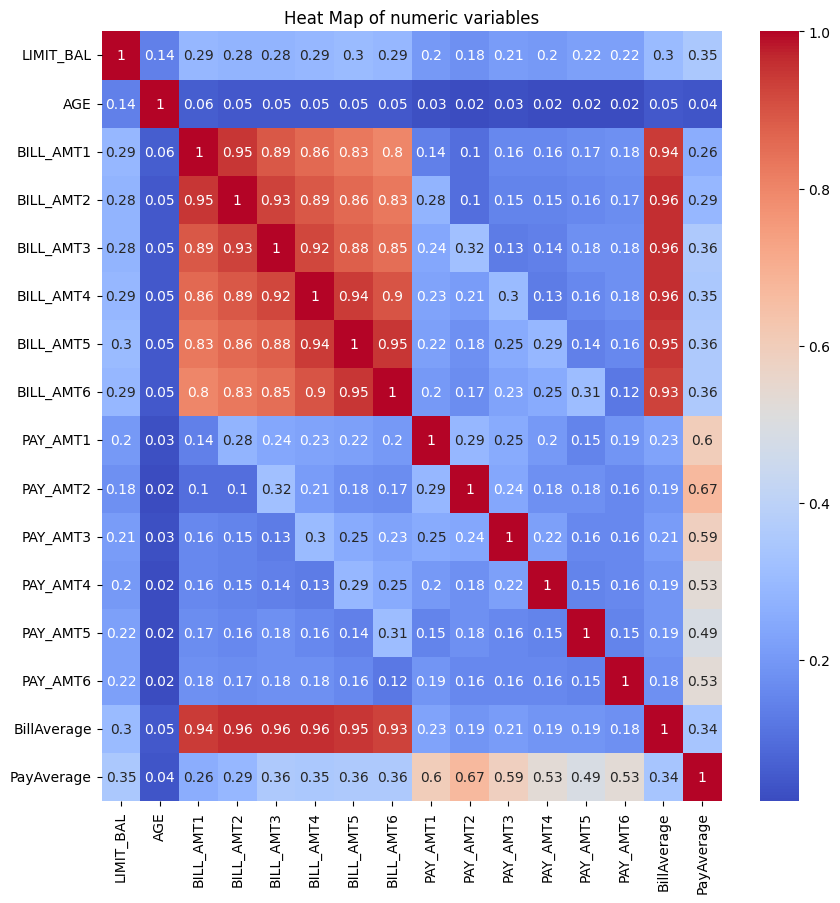

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pearson_correlation_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heat Map of numeric variables')
plt.show()

In [11]:
# Printing summary statistics of numeric variables:
print("\nSummary Statistics of numeric variables:")
data[numeric_variables].describe().transpose()


Summary Statistics of numeric variables:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


In [12]:
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'BillAverage', 'PayAverage'],
      dtype='object')


In [13]:
# Removing ID column and Bill Amount columns based on high correlation with variable BillAverage
data = data.drop(columns=['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
print(data.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'BillAverage', 'PayAverage'],
      dtype='object')


In [14]:
# Applying One-Hot Encoding technique to categorical variables Sex, Education and Marriage

from sklearn.preprocessing import OneHotEncoder

cat_variables = ['SEX','EDUCATION', 'MARRIAGE']

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[cat_variables])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_variables))

encoded_df = pd.concat([data, one_hot_df], axis=1)

encoded_df = encoded_df.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1)
print(f"Encoded dataframe: \n{encoded_df}")

Encoded dataframe: 
       LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  PAY_AMT1  \
0          20000   24      2      2     -1     -1     -2     -2         0   
1         120000   26     -1      2      0      0      0      2         0   
2          90000   34      0      0      0      0      0      0      1518   
3          50000   37      0      0      0      0      0      0      2000   
4          50000   57     -1      0     -1      0      0      0      2000   
...          ...  ...    ...    ...    ...    ...    ...    ...       ...   
29995     220000   39      0      0      0      0      0      0      8500   
29996     150000   43     -1     -1     -1     -1      0      0      1837   
29997      30000   37      4      3      2     -1      0      0         0   
29998      80000   41      1     -1      0      0      0     -1     85900   
29999      50000   46      0      0      0      0      0      0      2078   

       PAY_AMT2  ...  PayAverage  SEX_1  SEX_2  EDUCATI

In [15]:
print(encoded_df.columns)

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'BillAverage', 'PayAverage',
       'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')


In [16]:
#Normalizing the numeric attributes
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Fitting and transforming the data
normalized_data = scaler.fit_transform(encoded_df)
normalized_df = pd.DataFrame(scaler.transform(encoded_df), index=encoded_df.index, columns=encoded_df.columns)

In [17]:
# Validating minimum and maximum values are set as 0.00 and 1.00 respectively
pd.DataFrame(normalized_df).describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,PayAverage,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.249750,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,0.006483,0.003516,...,0.008409,0.396267,0.603733,0.352833,0.467667,0.163900,0.015600,0.455300,0.532133,0.012567
std,0.131058,0.158929,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,0.018961,0.013680,...,0.016160,0.489129,0.489129,0.477859,0.498962,0.370191,0.123924,0.498006,0.498975,0.111396
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.120690,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,0.001145,0.000495,...,0.001774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.131313,0.224138,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.002404,0.001193,...,0.003822,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.232323,0.344828,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.005731,0.002969,...,0.008901,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Dataset partition
X = pd.DataFrame(normalized_df).drop('default.payment.next.month', axis=1, inplace=False)
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,...,PayAverage,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.000000,0.000409,...,0.000183,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.000000,0.000594,...,0.001328,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.001738,0.000891,...,0.002927,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.002290,0.001199,...,0.002228,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.002290,0.021779,...,0.015688,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
y = data['default.payment.next.month']

In [21]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets: training set 70%, test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(21000, 25) (9000, 25)


In [22]:
print("Train->")
print(y_train.value_counts(normalize=True))
print("Test->")
print(y_test.value_counts(normalize=True))

Train->
default.payment.next.month
0    0.77881
1    0.22119
Name: proportion, dtype: float64
Test->
default.payment.next.month
0    0.778778
1    0.221222
Name: proportion, dtype: float64


In [23]:
from collections import Counter
# summarizing class distribution before applying SMOTE
print(Counter(y_train))

Counter({0: 16355, 1: 4645})


In [24]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE to transform the dataset
oversample = SMOTE()

#Fitting and applying the transform
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarizing the new class distribution after applying SMOTE
print(Counter(y_train))

Counter({0: 16355, 1: 16355})


In [25]:
# Starting the timer to measure the time the Logistic Regression model takes to be trained and tested
import time

# Start the timer
start_time_log_reg = time.time()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Initializing the logistic regression model as baseline model

log_reg = LogisticRegression()

In [27]:
# Performing stratified cross-validation for Logistic Regression on the training set
from sklearn.model_selection import StratifiedKFold, cross_val_score

sk_folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

scores = cross_val_score(log_reg, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validation Scores:  [0.67471721 0.67823296 0.6718129  0.67853867 0.67487007]
Average CV Score:  0.6756343625802506
Number of CV Scores used in Average:  5


In [28]:
# Training the logistic regression model on the full training set
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Making predictions with Logistic Regression on the test set
y_pred = log_reg.predict(X_test)

In [30]:
# End the timer for Logistic Regression
end_time_log_reg = time.time()

# Calculating the time for Logistic Regression model
elapsed_time = end_time_log_reg - start_time_log_reg
print(f"Time Logistic Regression model takes to be trained and tested: {elapsed_time:.2f} seconds")

Time Logistic Regression model takes to be trained and tested: 22.10 seconds


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Calculating evaluation metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
print("Confusion Matrix Logistic Regression before hyperparameter tuning:\n", conf_matrix)
print("Accuracy Logistic Regression:", accuracy)
print("Precision Logistic Regression:", precision)
print("Recall Logistic Regression:", recall)
print("F1 score Logistic Regression:", f1)

Confusion Matrix Logistic Regression before hyperparameter tuning:
       0     1
0  4784  2225
1   709  1282
Accuracy Logistic Regression: 0.674
Precision Logistic Regression: 0.36555460507556314
Recall Logistic Regression: 0.6438975389251632
F1 score Logistic Regression: 0.4663514005092761


In [33]:
# Printing precision, recall, f1-score and accuracy from the perspective of each of the class (0 and 1)
from sklearn.metrics import classification_report
from sklearn import metrics

print("Classification Report for Logistic Regression before hyperparameter tuning:\n")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression before hyperparameter tuning:

              precision    recall  f1-score   support

           0       0.87      0.68      0.77      7009
           1       0.37      0.64      0.47      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.76      0.67      0.70      9000



In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives_LG (TN):", tn)
print("False Positives_LG (FP):", fp)
print("False Negatives_LG (FN):", fn)
print("True Positives_LG (TP):", tp)

True Negatives_LG (TN): 4784
False Positives_LG (FP): 2225
False Negatives_LG (FN): 709
True Positives_LG (TP): 1282


AUC-ROC for Logistic Regression before hyperparameter tuning: 0.66


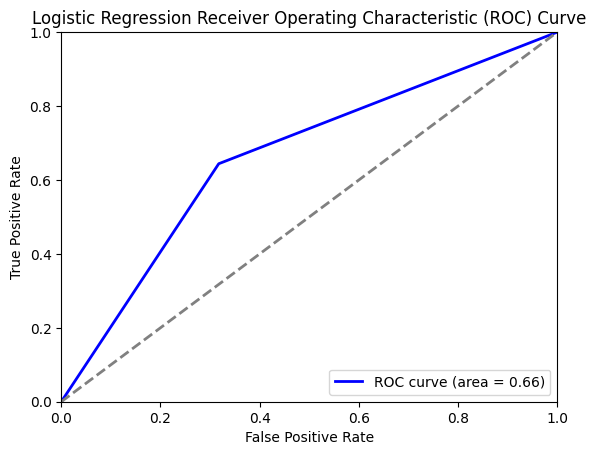

np.float64(0.6632242723873926)

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Calculating AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Logistic Regression before hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [36]:
# Performing hyperparameter tuning for Logistic Regression
from sklearn.model_selection import RandomizedSearchCV

param_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(log_reg, param_distributions=param_lr, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, verbose=2)

In [37]:
print("Best Hyperparameters for Logistic Regression:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best Cross-Validation Score: 0.6749314140274337


In [38]:
best_log_reg = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 1)

best_log_reg.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [39]:
y_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report for Logistic Regression after hyperparameter tuning:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Logistic Regression after hyperparameter tuning: {auc:.2f}')

Test Accuracy: 0.6746
Classification Report for Logistic Regression after hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.87      0.68      0.77      7009
           1       0.37      0.64      0.47      1991

    accuracy                           0.67      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.76      0.67      0.70      9000

Confusion Matrix:
 [[4789 2220]
 [ 709 1282]]
AUC-ROC for Logistic Regression after hyperparameter tuning: 0.66


AUC-ROC for Logistic Regression after hyperparameter tuning: 0.66


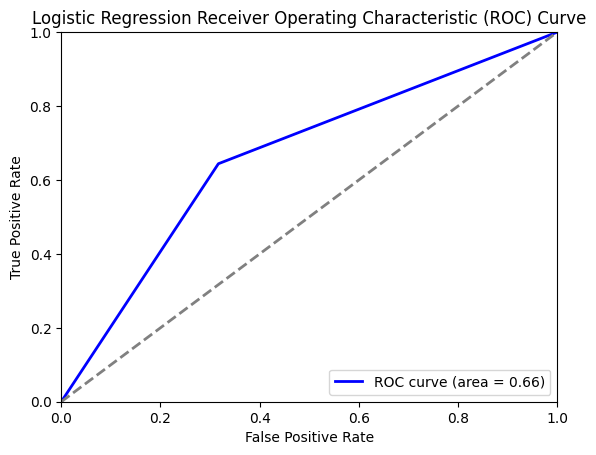

np.float64(0.6635809566504829)

In [40]:
# Calculating AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Logistic Regression after hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

        Feature  Importance
2         PAY_0    5.513111
4         PAY_3    0.683906
3         PAY_2    0.573585
5         PAY_4    0.391358
7         PAY_6    0.281144
18  EDUCATION_1    0.209200
1           AGE    0.180915
19  EDUCATION_2    0.080706
20  EDUCATION_3    0.017270
6         PAY_5   -0.023273
22   MARRIAGE_1   -0.136642
24   MARRIAGE_3   -0.180589
16        SEX_1   -0.281881
23   MARRIAGE_2   -0.361449
17        SEX_2   -0.396799
12     PAY_AMT5   -0.914096
21  EDUCATION_4   -0.985856
0     LIMIT_BAL   -1.258508
10     PAY_AMT3   -1.532369
14  BillAverage   -1.618102
13     PAY_AMT6   -2.111717
11     PAY_AMT4   -3.130799
9      PAY_AMT2   -3.369230
15   PayAverage   -3.739289
8      PAY_AMT1   -4.094235


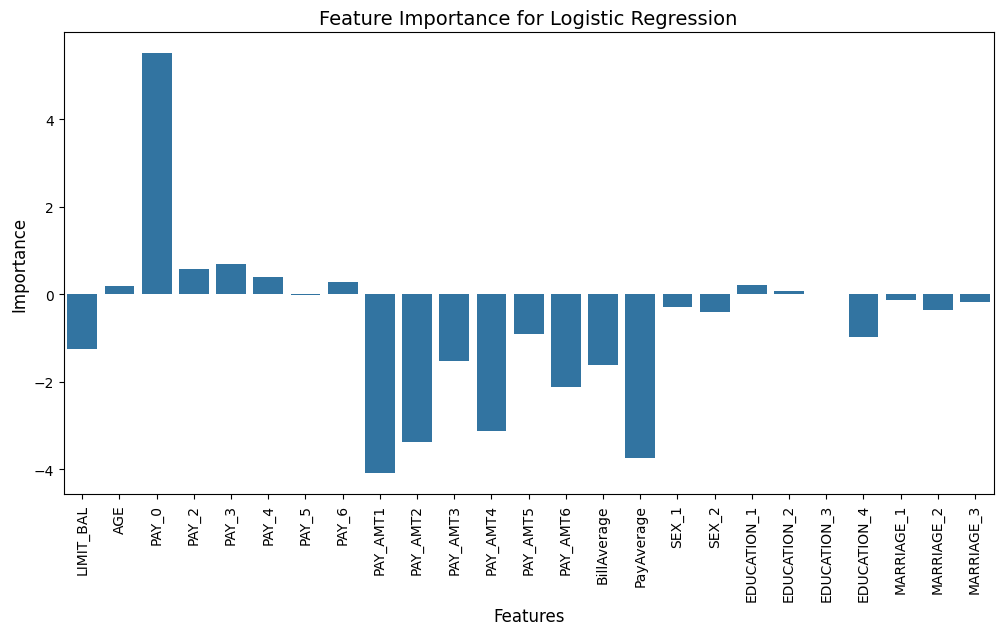

In [41]:
# Building feature importance for Logistic Regression
importance = best_log_reg.coef_[0]

feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values('Importance', ascending=False)
print(feature_imp_df)

# Plotting feature importance
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importance)
plt.title('Feature Importance for Logistic Regression', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.savefig("feature_importance_tuned.png", transparent=True)
plt.show()

In [42]:
# Starting the timer to measure the time the Random Forest model takes to be trained and tested
import time

# Start the timer
start_time_rf_classifier = time.time()

In [43]:
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier()

In [44]:
# Performing stratified cross-validation for Random Forest on the training set
sk_folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

scores = cross_val_score(rf_classifier, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86105167 0.86105167 0.84974014 0.86105167 0.85661877]
Average CV Score:  0.8579027820238461
Number of CV Scores used in Average:  5


In [45]:
# Training the Random Forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Making predictions with Random Forest classifier on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# End the timer for Random Forest
end_time_rf_classifier = time.time()

# Calculating the time for Random Forest model
elapsed_time = end_time_rf_classifier - start_time_rf_classifier
print(f"Time Random Forest model takes to be trained and tested: {elapsed_time:.2f} seconds")

Time Random Forest model takes to be trained and tested: 39.30 seconds


In [47]:
# Calculating evaluation metrics for Random Forest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
print("Confusion Matrix Random Forest before hyperparameter tuning:\n", conf_matrix)
print("Accuracy Random Forest:", accuracy)
print("Precision Random Forest:", precision)
print("Recall Random Forest:", recall)
print("F1 score Random Forest:", f1)

Confusion Matrix Random Forest before hyperparameter tuning:
       0    1
0  6278  731
1  1094  897
Accuracy Random Forest: 0.7972222222222223
Precision Random Forest: 0.550982800982801
Recall Random Forest: 0.45052737317930686
F1 score Random Forest: 0.4957170489085383


In [48]:
# Printing precision, recall, f1-score and accuracy from the perspective of each of the class (0 and 1)
from sklearn.metrics import classification_report
from sklearn import metrics

print('Classification Report for Random Forest before hyperparameter tuning:')
print(classification_report(y_test, y_pred))

Classification Report for Random Forest before hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7009
           1       0.55      0.45      0.50      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.67      0.68      9000
weighted avg       0.79      0.80      0.79      9000



In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives_LG (TN):", tn)
print("False Positives_LG (FP):", fp)
print("False Negatives_LG (FN):", fn)
print("True Positives_LG (TP):", tp)

True Negatives_LG (TN): 6278
False Positives_LG (FP): 731
False Negatives_LG (FN): 1094
True Positives_LG (TP): 897


AUC-ROC for Random Forest before hyperparameter tuning: 0.67


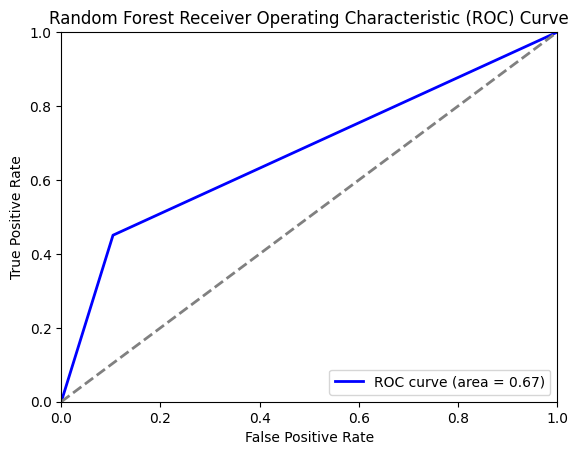

np.float64(0.6731164473258499)

In [50]:
# Calculating AUC-ROC for Random Forest
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Random Forest before hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [51]:
# Performing hyperparameter tuning for Random Forest
# Defining the parameters
param_rf = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2']
}

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_rf, cv=3, n_jobs=-1, verbose=2, n_iter=5)

# Fitting the search to the data
random_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Cross-Validation Score: 0.831796935546289


In [52]:
best_rf = RandomForestClassifier(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_features= 'log2', max_depth= None)

best_rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=50)

In [53]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report for Random Forest after hyperparameter tuning:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Random Forest after hyperparameter tuning: {auc:.2f}')

Test Accuracy: 0.7953
Classification Report for Random Forest after hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7009
           1       0.54      0.47      0.50      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.68      0.69      9000
weighted avg       0.79      0.80      0.79      9000

Confusion Matrix:
 [[6232  777]
 [1065  926]]
AUC-ROC for Random Forest after hyperparameter tuning: 0.68


AUC-ROC for Random Forest after hyperparameter tuning: 0.68


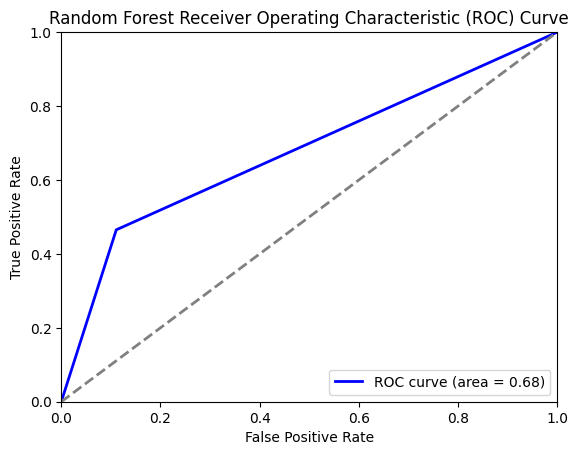

np.float64(0.6771177245815615)

In [54]:
# Calculating AUC-ROC for Random Forest
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Random Forest after hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

        Feature  Importance
2         PAY_0    0.142349
0     LIMIT_BAL    0.092095
1           AGE    0.068333
14  BillAverage    0.065802
9      PAY_AMT2    0.062079
15   PayAverage    0.060097
8      PAY_AMT1    0.056128
10     PAY_AMT3    0.054445
13     PAY_AMT6    0.054430
12     PAY_AMT5    0.053185
11     PAY_AMT4    0.050372
3         PAY_2    0.045291
4         PAY_3    0.040514
7         PAY_6    0.032653
6         PAY_5    0.030525
5         PAY_4    0.029863
19  EDUCATION_2    0.009479
18  EDUCATION_1    0.008730
22   MARRIAGE_1    0.008412
23   MARRIAGE_2    0.008392
17        SEX_2    0.008192
16        SEX_1    0.007698
20  EDUCATION_3    0.007057
21  EDUCATION_4    0.002136
24   MARRIAGE_3    0.001741


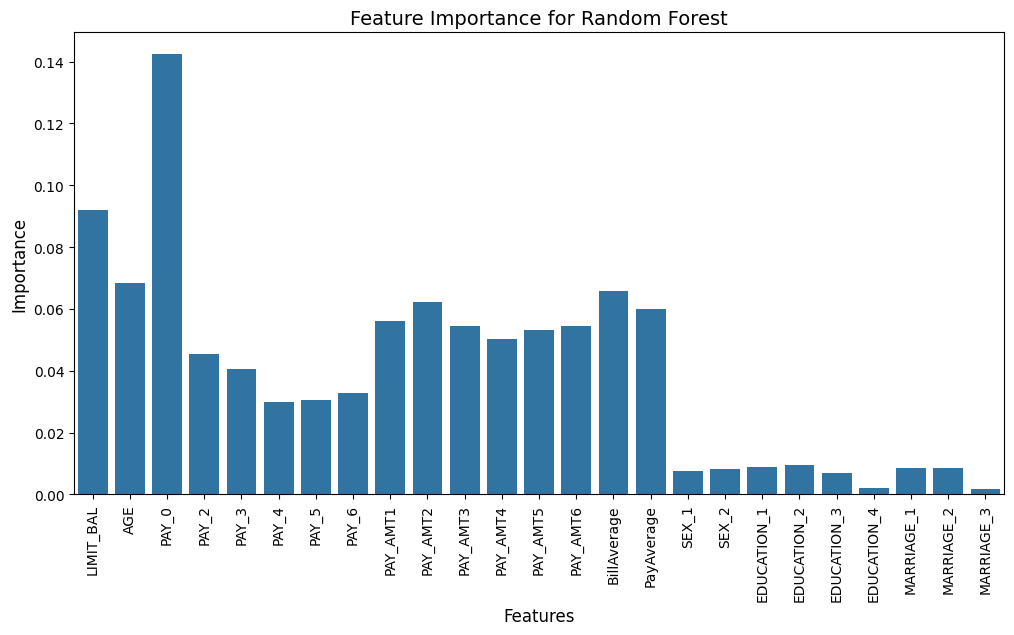

In [55]:
importance = best_rf.feature_importances_

feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values('Importance', ascending=False)
print(feature_imp_df)

features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importance)
plt.title('Feature Importance for Random Forest', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.savefig("feature_importance_tuned.png", transparent=True)
plt.show()

In [56]:
# Starting the timer to measure the time the Gradient Boosting model takes to be trained and tested
import time

# Start the timer
start_time_gb_clf = time.time()

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
# Initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

In [58]:
# Performing stratified cross-validation for Gradient Boosting on the training set
sk_folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

scores = cross_val_score(gb_clf, X_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80755121 0.81228982 0.80051972 0.80923265 0.79914399]
Average CV Score:  0.8057474778355243
Number of CV Scores used in Average:  5


In [59]:
# Training the Gradient Boosting model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
# Making predictions with Gradient Boosting classifier
y_pred = gb_clf.predict(X_test)

In [61]:
# End the timer for Gradient Boosting
end_time_gb_clf = time.time()

# Calculating the time for Gradient Boosting model
elapsed_time = end_time_gb_clf - start_time_gb_clf
print(f"Time Gradient Boosting model takes to be trained and tested: {elapsed_time:.2f} seconds")

Time Gradient Boosting model takes to be trained and tested: 99.69 seconds


In [62]:
# Calculating evaluation metrics for Gradient Boosting
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
print("Confusion Matrix Gradient Boosting before hyperparameter tuning:\n", conf_matrix)
print("Accuracy Gradient Boosting:", accuracy)
print("Precision Gradient Boosting:", precision)
print("Recall Gradient Boosting:", recall)
print("F1 score Gradient Boosting:", f1)

Confusion Matrix Gradient Boosting before hyperparameter tuning:
       0    1
0  6259  750
1  1040  951
Accuracy Gradient Boosting: 0.8011111111111111
Precision Gradient Boosting: 0.5590828924162258
Recall Gradient Boosting: 0.4776494224008036
F1 score Gradient Boosting: 0.5151679306608884


In [63]:
# Printing precision, recall, f1-score and accuracy from the perspective of each of the class (0 and 1)
from sklearn.metrics import classification_report
from sklearn import metrics

print('Classification Report for Gradient Boosting before hyperparameter tuning:')
print(classification_report(y_test, y_pred))

Classification Report for Gradient Boosting before hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7009
           1       0.56      0.48      0.52      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.69      0.70      9000
weighted avg       0.79      0.80      0.80      9000



In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives_LG (TN):", tn)
print("False Positives_LG (FP):", fp)
print("False Negatives_LG (FN):", fn)
print("True Positives_LG (TP):", tp)

True Negatives_LG (TN): 6259
False Positives_LG (FP): 750
False Negatives_LG (FN): 1040
True Positives_LG (TP): 951


AUC-ROC for Gradient Boosting before hyperparameter tuning: 0.69


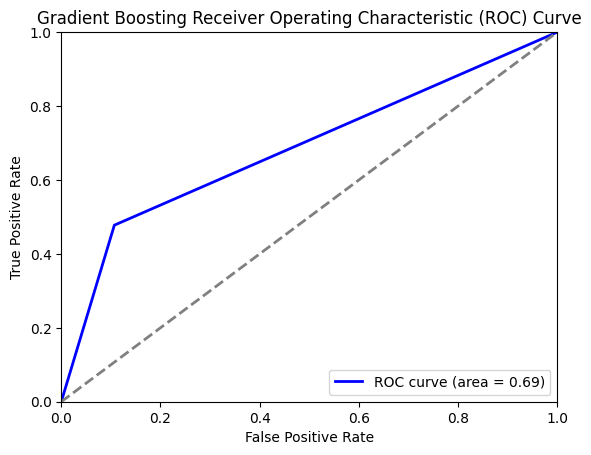

np.float64(0.6853220717368549)

In [65]:
# Calculating AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Gradient Boosting before hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [66]:
import numpy as np

# Performing hyperparameter tuning for Gradient Boosting
# Defining the parameters
param_gb = {
'learning_rate': np.arange(0.01, 0.2, 0.01),
'n_estimators': [100, 200, 300],
'max_depth': [3, 5, 7]
}

# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=param_gb, cv=3, n_jobs=-1, verbose=2, n_iter=3)

# Fitting the search to the data
random_search.fit(X_train, y_train)

# Printing the best parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)
best_model_random = random_search.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': np.float64(0.08)}
Best Cross-Validation Score: 0.8194804209251608


In [67]:
best_gb = GradientBoostingClassifier(n_estimators= 300, max_depth= 5, learning_rate= 0.08)
best_gb.fit(X_train, y_train)

y_pred = best_gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report for Gradient Boosting after hyperparameter tuning:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Gradient Boosting after hyperparameter tuning: {auc:.2f}')

Test Accuracy: 0.8113
Classification Report for Gradient Boosting after hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.61      0.40      0.48      1991

    accuracy                           0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.79      0.81      0.80      9000

Confusion Matrix:
 [[6506  503]
 [1195  796]]
AUC-ROC for Gradient Boosting after hyperparameter tuning: 0.66


AUC-ROC for Gradient Boosting after hyperparameter tuning: 0.66


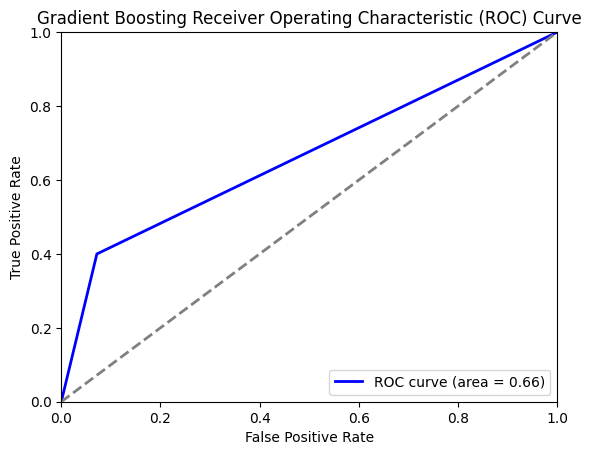

np.float64(0.6640171110989609)

In [68]:
# Calculating AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC for Gradient Boosting after hyperparameter tuning: {auc:.2f}')

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

        Feature  Importance
2         PAY_0    0.383101
0     LIMIT_BAL    0.224334
1           AGE    0.096891
7         PAY_6    0.042047
4         PAY_3    0.029737
15   PayAverage    0.028561
14  BillAverage    0.028496
13     PAY_AMT6    0.023523
5         PAY_4    0.023244
6         PAY_5    0.020635
8      PAY_AMT1    0.020494
9      PAY_AMT2    0.015146
12     PAY_AMT5    0.014518
10     PAY_AMT3    0.013896
11     PAY_AMT4    0.012209
3         PAY_2    0.011003
21  EDUCATION_4    0.003576
18  EDUCATION_1    0.001827
19  EDUCATION_2    0.001670
22   MARRIAGE_1    0.001437
16        SEX_1    0.001431
20  EDUCATION_3    0.000862
17        SEX_2    0.000728
23   MARRIAGE_2    0.000429
24   MARRIAGE_3    0.000206


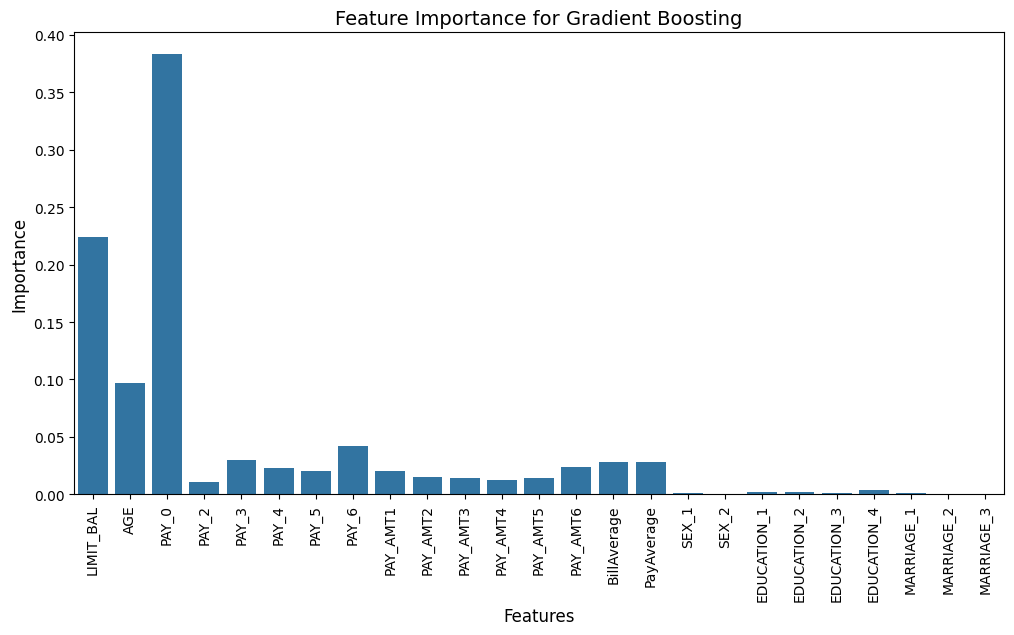

In [69]:
import seaborn as sns
#Feature Importances after Hyperparameter Tuning
importances = best_gb.feature_importances_

feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
print(feature_imp_df)

features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance for Gradient Boosting', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.savefig("feature_importance_tuned.png", transparent=True)
plt.show()

In [ ]:
#!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra
#!apt-get install texlive texlive-latex-extra pandoc
#!jupyter nbconvert --to pdf "/content/Big_Data_Analytics_Project_Data Transformation & Modeling_Mar16.ipynb"